In [1]:
import pandas as pd

# File paths
files = {
    "2017": "../data/processed/toxprot_2017.csv",
    "2025": "../data/processed/toxprot_2025.csv",
}

# Taxa to search for in the 'Order' column
taxa = ["Squamata", "Araneae", "Neogastropoda", "Scorpiones"]

for year, path in files.items():
    df = pd.read_csv(path)
    total = len(df)
    print(f"\nYear: {year} (Total entries: {total})")
    total_count = 0
    total_percent = 0.0
    for taxon in taxa:
        count = df["Order"].fillna("").str.contains(taxon, case=False).sum()
        percent = 100 * count / total if total > 0 else 0
        total_count += count
        total_percent += percent
        print(f"  {taxon:15}: {count:4} ({percent:.2f}%)")
    print(f"  {'SUM':15}: {total_count:4} ({total_percent:.2f}%)")


Year: 2017 (Total entries: 6703)
  Squamata       : 2339 (34.89%)
  Araneae        : 1485 (22.15%)
  Neogastropoda  : 1195 (17.83%)
  Scorpiones     :  963 (14.37%)
  SUM            : 5982 (89.24%)

Year: 2025 (Total entries: 8055)
  Squamata       : 2455 (30.48%)
  Araneae        : 1569 (19.48%)
  Neogastropoda  : 1484 (18.42%)
  Scorpiones     : 1175 (14.59%)
  SUM            : 6683 (82.97%)


In [2]:
# File paths
file_2017 = "../data/processed/toxprot_2017.csv"
file_2025 = "../data/processed/toxprot_2025.csv"

# Read data
df_2017 = pd.read_csv(file_2017)
df_2025 = pd.read_csv(file_2025)

# Count proteins per Family for each year
fam_2017 = df_2017["Family"].value_counts()
fam_2025 = df_2025["Family"].value_counts()

# Only consider families present in 2017
common_families = fam_2017.index
fam_2025_common = fam_2025.reindex(common_families).fillna(0)

# Combine into a DataFrame
df = pd.DataFrame({"2017": fam_2017, "2025": fam_2025_common})

# Calculate percent and absolute increase (avoid division by zero)
df["absolute_increase"] = df["2025"] - df["2017"]
df["percent_increase"] = (
    (df["2025"] - df["2017"]) / df["2017"].replace(0, pd.NA)
) * 100

# Get top 5 families with largest percent increase (among those present in 2017)
top5_pct = df.sort_values("percent_increase", ascending=False).head(5)

# Get top 5 families with largest absolute increase (among those present in 2017)
top5_abs = df.sort_values("absolute_increase", ascending=False).head(5)

print(
    "Top 5 families (by 'Family' column) with the largest percent increase from 2017 to 2025 (only families present in 2017 considered):"
)
print(top5_pct[["2017", "2025", "absolute_increase", "percent_increase"]])

print(
    "\nTop 5 families (by 'Family' column) with the largest absolute increase from 2017 to 2025 (only families present in 2017 considered):"
)
print(top5_abs[["2017", "2025", "absolute_increase", "percent_increase"]])

Top 5 families (by 'Family' column) with the largest percent increase from 2017 to 2025 (only families present in 2017 considered):
            2017  2025  absolute_increase  percent_increase
Family                                                     
Ixodidae       1    36                 35       3500.000000
Tabanidae      1    22                 21       2100.000000
Reduviidae     3    45                 42       1400.000000
Lineidae       3    22                 19        633.333333
Scoliidae      1     4                  3        300.000000

Top 5 families (by 'Family' column) with the largest absolute increase from 2017 to 2025 (only families present in 2017 considered):
                2017  2025  absolute_increase  percent_increase
Family                                                         
Conidae         1099  1385                286         26.023658
Buthidae         786   972                186         23.664122
Scolopendridae    52   196                144        276.9

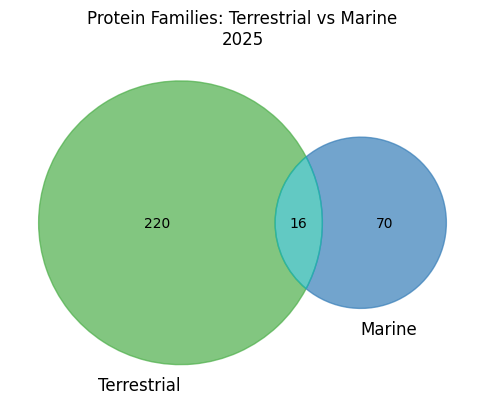

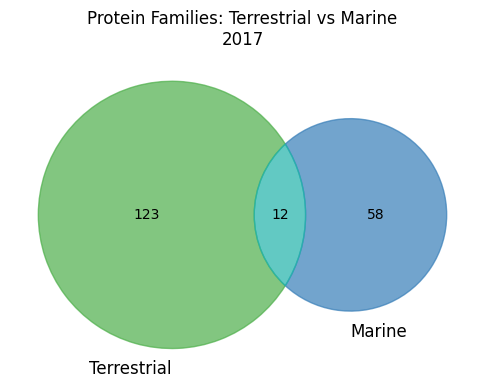

In [3]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2


def plot_venn_for_year(csv_path, year_label=None):
    """
    Plots a Venn diagram of protein families for terrestrial vs marine habitats for a given CSV file.
    Terrestrial is green, marine is blue.
    """
    df = pd.read_csv(csv_path)
    # Get sets of protein families for each habitat
    marine_families = set(
        df[df["Habitat"].str.lower() == "marine"]["Protein families"].dropna()
    )
    terrestrial_families = set(
        df[df["Habitat"].str.lower() == "terrestrial"]["Protein families"].dropna()
    )
    plt.figure(figsize=(6, 6))
    v = venn2(
        [terrestrial_families, marine_families],
        set_labels=("Terrestrial", "Marine"),
    )
    # Set colors: terrestrial = green, marine = blue
    if v.get_patch_by_id("10"):
        v.get_patch_by_id("10").set_color("#4daf4a")  # green
        v.get_patch_by_id("10").set_alpha(0.7)
    if v.get_patch_by_id("01"):
        v.get_patch_by_id("01").set_color("#377eb8")  # blue
        v.get_patch_by_id("01").set_alpha(0.7)
    if v.get_patch_by_id("11"):
        v.get_patch_by_id("11").set_color("#20B2AA")  # light sea green - better teal
        v.get_patch_by_id("11").set_alpha(0.7)
    if year_label is None:
        year_label = csv_path.split("/")[-1]
    plt.title(f"Protein Families: Terrestrial vs Marine\n{year_label}")
    plt.show()


# Plot for 2025
plot_venn_for_year("../data/processed/toxprot_2025.csv", year_label="2025")

# Plot for 2017
plot_venn_for_year("../data/processed/toxprot_2017.csv", year_label="2017")

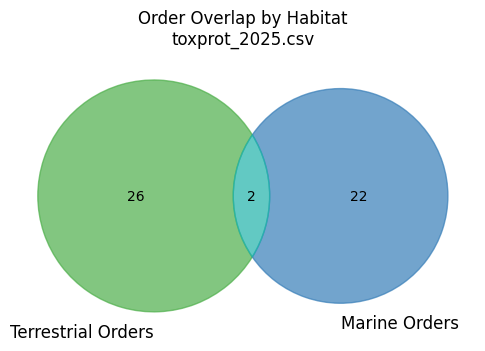

In [ ]:
# Choose dataset: change the file path for 2017 or 2025
csv_path = "../data/processed/toxprot_2025.csv"

# Read the data
df = pd.read_csv(csv_path)

# Get sets of orders for each habitat
marine_orders = set(df[df["Habitat"].str.lower() == "marine"]["Order"].dropna())
terrestrial_orders = set(
    df[df["Habitat"].str.lower() == "terrestrial"]["Order"].dropna()
)

# Create a Venn diagram
plt.figure(figsize=(6, 6))
v = venn2(
    [terrestrial_orders, marine_orders],
    set_labels=("Terrestrial Orders", "Marine Orders"),
)
# Set colors: terrestrial = green, marine = blue
if v.get_patch_by_id("10"):
    v.get_patch_by_id("10").set_color("#4daf4a")  # green
    v.get_patch_by_id("10").set_alpha(0.7)
if v.get_patch_by_id("01"):
    v.get_patch_by_id("01").set_color("#377eb8")  # blue
    v.get_patch_by_id("01").set_alpha(0.7)
if v.get_patch_by_id("11"):
    v.get_patch_by_id("11").set_color("#20B2AA")  # light sea green - better teal
    v.get_patch_by_id("11").set_alpha(0.7)
plt.title(f"Order Overlap by Habitat\n{csv_path.split('/')[-1]}")
plt.show()

In [4]:
import numpy as np

toxprot_2025 = "../data/processed/toxprot_2025.csv"
toxprot_2017 = "../data/processed/toxprot_2017.csv"

df_2025 = pd.read_csv(toxprot_2025)
df_2017 = pd.read_csv(toxprot_2017)

# Define bins for sequence length
bins = list(range(1, 301, 25)) + [np.inf]
labels = [f"{start}-{end - 1}" for start, end in zip(bins[:-2], bins[1:-1])] + ["300+"]

# Bin the Length column for both years
df_2017["Length_bin"] = pd.cut(df_2017["Length"], bins=bins, labels=labels, right=False)
df_2025["Length_bin"] = pd.cut(df_2025["Length"], bins=bins, labels=labels, right=False)

# Count number of sequences in each bin
count_2017 = df_2017["Length_bin"].value_counts().sort_index()
count_2025 = df_2025["Length_bin"].value_counts().sort_index()

# Calculate percentage increase for each bin
pct_increase = ((count_2025 - count_2017) / count_2017) * 100

# Combine into a DataFrame for display
result = pd.DataFrame(
    {"2017_count": count_2017, "2025_count": count_2025, "pct_increase": pct_increase}
)

print(result)

            2017_count  2025_count  pct_increase
Length_bin                                      
1-25               776         928     19.587629
26-50              930        1081     16.236559
51-75             1428        1843     29.061625
76-100            1603        1879     17.217717
101-125            519         642     23.699422
126-150            420         466     10.952381
151-175            154         171     11.038961
176-200             55          78     41.818182
201-225             66          94     42.424242
226-250            130         152     16.923077
251-275            264         280      6.060606
300+               358         441     23.184358


In [ ]:
toxprot_2025 = "../data/processed/toxprot_2025.csv"
toxprot_2017 = "../data/processed/toxprot_2017.csv"

df_2025 = pd.read_csv(toxprot_2025)
df_2017 = pd.read_csv(toxprot_2017)

# Get value counts for each year
vc_2025 = df_2025["Protein existence"].value_counts(dropna=False)
vc_2017 = df_2017["Protein existence"].value_counts(dropna=False)

# Get all unique categories from both years
all_categories = set(vc_2025.index).union(set(vc_2017.index))

# Prepare output rows
rows = []
total_2017 = vc_2017.sum()
total_2025 = vc_2025.sum()

for cat in sorted(
    all_categories, key=lambda x: (str(x).lower() if pd.notnull(x) else "")
):
    count_2017 = vc_2017.get(cat, 0)
    count_2025 = vc_2025.get(cat, 0)
    pct_2017 = (count_2017 / total_2017 * 100) if total_2017 > 0 else 0
    pct_2025 = (count_2025 / total_2025 * 100) if total_2025 > 0 else 0
    rows.append(
        {
            "Protein existence": cat,
            "2017_count": f"{count_2017} ({pct_2017:.1f}%)",
            "2025_count": f"{count_2025} ({pct_2025:.1f}%)",
        }
    )

result_df = pd.DataFrame(rows)
print(result_df)

                  Protein existence    2017_count    2025_count
0     1: Evidence at protein level;  3814 (56.9%)  4878 (60.6%)
1  2: Evidence at transcript level;  2314 (34.5%)  2031 (25.2%)
2        3: Inferred from homology;    572 (8.5%)  1143 (14.2%)
3                     5: Uncertain;      3 (0.0%)      3 (0.0%)
